In [130]:
import pandas as pd
import nltk
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from collections import Counter
import datetime

In [131]:
stopWords = stopwords.words('english')

In [132]:
cablesDF = pd.read_csv('CFPF-JIEYAN - data.csv')

In [133]:
cablesText = cablesDF['BODY']

In [134]:
for (i, text) in enumerate(cablesText):
    try:
        cablesText[i] = text.lower()
    except:
        cablesText[i] = 'n/a'
cablesText

0      mrn: 1973peking001397  segment number: 000001 ...
1      mrn: 1973nato b006022  segment number: 000001 ...
2      mrn: 1973nato b006060  segment number: 000001 ...
3      mrn: 1973nato b006064  segment number: 000001 ...
4      1.  need to get as detailed description of veh...
                             ...                        
624    1.  i saw king hussein january 10 on another i...
625    1. i saw richard, grennan, and mansfield at no...
626    2) begin text\ndear dr. kissinger,\nthank you ...
627    1. i arrived cape town 1330 today and with amb...
628    reference:  london 630\n1.  tony duff has give...
Name: BODY, Length: 629, dtype: object

In [135]:
for (i, text) in enumerate(cablesText):
    if cablesText[i] == 'n/a':
        print(i)

37
52
72
94
105
113
121
123
124
132
133
141
153
154
157
160
163
184
187
199
206
283
323
350
361
450
509
533
534
538
552
577
620
621
622


In [136]:
type(cablesText[620])

str

In [137]:
len(cablesText)

629

In [138]:
cables = [cablesText[i] for i in range(len(cablesText))]
cables[-1]

'reference:  london 630\\n1.  tony duff has given us the new british paper as\\nfinally approved by ministers and pointed out changes\\nfrom the first draft transmitted in reftel.\\n2.  the title, to which the foreign office attaches\\ngreat importance, has been changed to read, "suggestions\\nfor possible structure of transitional government:  note\\nby chairman of the conference."\\n3.  change para two, sentence four to read:  "but also\\nfor a participation by representatives of the european\\nminority sufficient to ensure that their interests were\\ntaken into account."\\n4.  change para three, sentence two to read:  "they\\nproceed on the basis that where solutions can be found\\nusing purely rhodesian elements, that should be done."\\n5.  change para five, sub-para one, sentence one to read:\\n"the transitional government would be headed by an\\ninterim commissioner who would be appointed by the britis\\ngovernment, after due consultations."\\n6.  change last word in para five, s

In [139]:
url = ('http://api.foiarchive.org/docs?'
       'corpus=eq.pdb&authored=gte.1973-10-01&'
       'select=doc_id,authored,classification,title,body')
response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON
print(len(payload))

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload[-1])

Request returned 200 : 'OK'
1018
{'authored': '1977-01-04T00:00:00+00:00',
 'body': ' The President’s Daily Brief January 4, 1977 “Fp Sore Exempt from '
         'general declassificatan schedule of EO. 11652 exemption category '
         'SB()),(2443) declassified only on approval of the Director of '
         'Central Intelligence FOR THE PRESIDENT ONLY January 4, 1977 Table of '
         'Contents Rhodesia: Rhodesian nationalist leaders and presidents of '
         'the front-line African countries reportedly are considering ways to '
         'improve the military performance of the Rhodesian guer-~ rillas. '
         '(Page i) Note: India (Page 2) FOR THE PRESIDENT ONLY Vw i Atrican '
         'Republic’ i D Bangui ita taho x Yaounde st Es fal Gunga g —_ i& '
         'Libreville Congo J Gabon Vretona} Zaire “Dek ag \\Bujuphbura~” Ly '
         '‘undi fe Brazzaville Sar ie an ar soul Angol a Ae Lf X Namibia '
         '{South-West Africa) Oar es Salaam Lusake7” gaat ev indhagk Wal

In [140]:
type(payload)

list

In [141]:
datesPdb = [payload[i]['authored'][:10] for i in range(len(payload))]
datesPdb.sort()
datesPdb[-1]

'1977-01-20'

In [142]:
datesPdbDt = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in datesPdb]
datesPdbDt[:10]

[datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 2, 0, 0),
 datetime.datetime(1973, 10, 3, 0, 0),
 datetime.datetime(1973, 10, 4, 0, 0),
 datetime.datetime(1973, 10, 5, 0, 0),
 datetime.datetime(1973, 10, 6, 0, 0),
 datetime.datetime(1973, 10, 8, 0, 0),
 datetime.datetime(1973, 10, 9, 0, 0),
 datetime.datetime(1973, 10, 10, 0, 0),
 datetime.datetime(1973, 10, 11, 0, 0)]

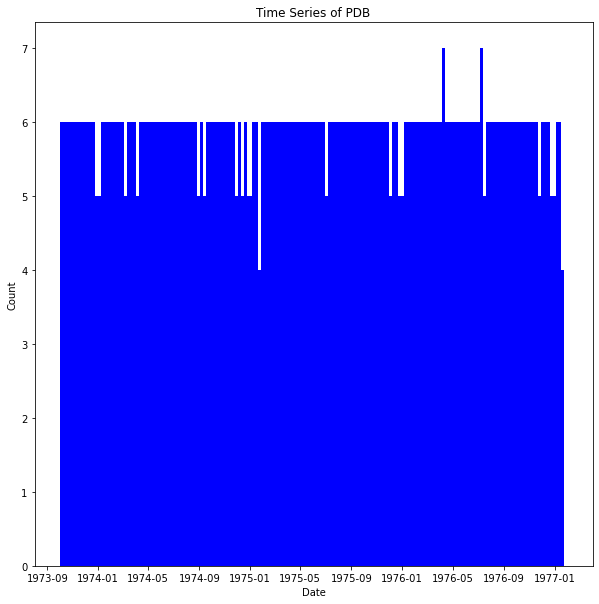

In [143]:
end = datetime.date(1977,2,1)
start = datetime.date(1973,10,1)
one_week = datetime.timedelta(days = 7)
week = []
for i in range(int(((end-start).days)/7)+1):
    week.append(start+(i)*one_week)
plt.figure(figsize=(10,10))
plt.hist(datesPdbDt, bins=week, color='b')
plt.title('Time Series of PDB')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('pdbTS',dpi=600)
plt.show()

In [144]:
dateCountsPdb = Counter(datesPdb)
dateCountsKissSeries = pd.Series(dateCountsPdb)

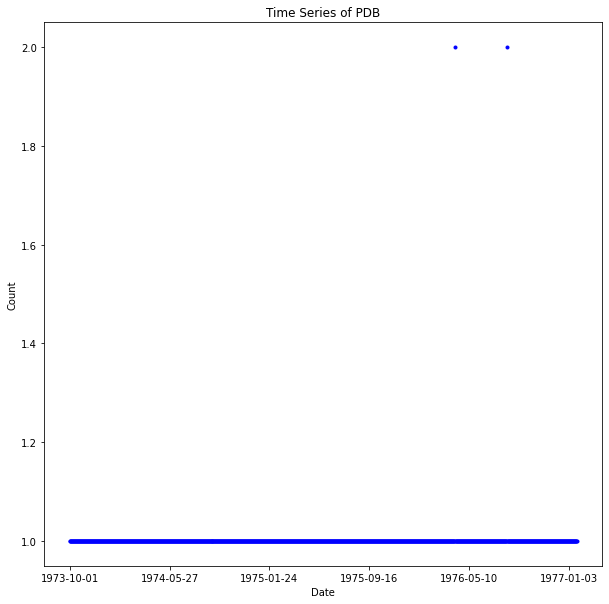

In [145]:
dateCountsPdbSeries.plot(style='b.',figsize=(10,10))
plt.title('Time Series of PDB')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('pdbTS-day',dpi=600)
plt.show()

In [146]:
pdbs = [payload[i]['body'] for i in range(len(payload))]

In [147]:
url2 = ('http://api.foiarchive.org/docs?'
        'corpus=eq.kissinger&authored=gte.1973-10-01&authored=lt.1977-02-01&'
        'select=doc_id,corpus,authored,title,body,countries(country_name),persons(full_name),topics(topic_name)&order=authored')

response = requests.get(url2)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON
print(len(payload))

Request returned 200 : 'OK'
4512


In [148]:
type(payload)

list

In [149]:
payload[0]

{'doc_id': '0000C1DF',
 'corpus': 'kissinger',
 'authored': '1973-10-01T00:00:00+00:00',
 'title': 'TELECON WITH SEN. LONG/HAK AT 9;37 a.m.',
 'body': "                                               UNCLASSIFIED\n          TELCON\n          Sen. Long/HAK\n          10/I/73 - 9:37 a. m.\n                                                                              RELEASED IN FULL\n          K:    Hello.\n\n               How     are you, Mr. Secretary?\n          K:    Hour    are you, Senator?\n                Fine.\n                Senator, I understand        you   are having hearings today          on   Mr. Sonnenfeldt.\n\n                yye   hope to wrap   it   up today.    At       least the hearings.\n         K:     Right. Well, Senator what I wanted to tell you, on a confidential basis,\n                is that I'm considering him, without a decision having been made also,\n                for a position in the State Department which will also require\n                confir

In [150]:
datesKiss = [payload[i]['authored'][:10] for i in range(len(payload))]
datesKiss.sort()

In [151]:
datesKissDt = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in datesKiss]
datesKissDt[:10]

[datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0),
 datetime.datetime(1973, 10, 1, 0, 0)]

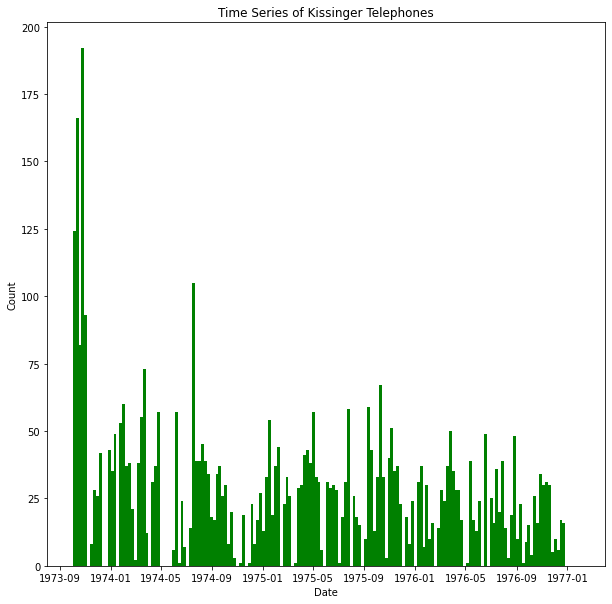

In [152]:
end = datetime.date(1977,2,1)
start = datetime.date(1973,10,1)
one_week = datetime.timedelta(days = 7)
week = []
for i in range(int(((end-start).days)/7)+1):
    week.append(start+(i)*one_week)
plt.figure(figsize=(10,10))
plt.hist(datesKissDt, bins=week, color='g')
plt.title('Time Series of Kissinger Telephones')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('kissTS',dpi=600)
plt.show()

In [153]:
dateCountsKiss = Counter(datesKiss)
dateCountsKissSeries = pd.Series(dateCountsKiss)

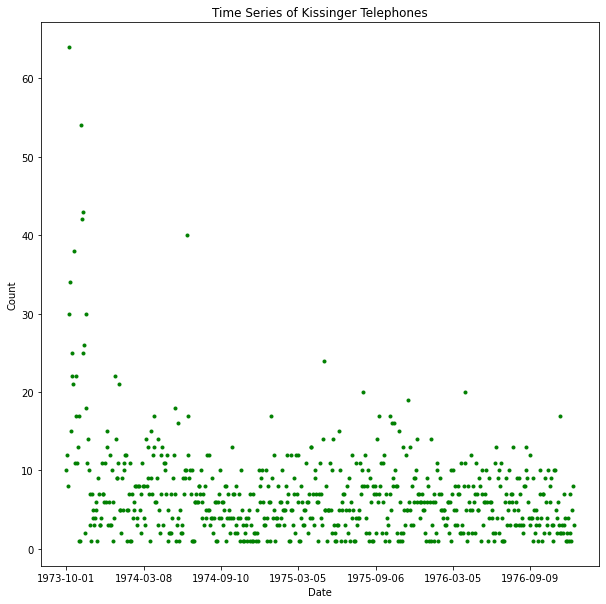

In [154]:
dateCountsKissSeries.plot(style='g.',figsize=(10,10))
plt.title('Time Series of Kissinger Telephones')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('kissTS-day',dpi=600)
plt.show()

In [155]:
kissinger = [payload[i]['body'] for i in range(len(payload))] 

In [156]:
allTexts = cables + pdbs + kissinger

In [157]:
tfidfVectorizer = TfidfVectorizer(max_features=400, stop_words=stopWords)
textMatrix = tfidfVectorizer.fit_transform(allTexts)
denseTextMatrix = textMatrix.todense()
denseTextMatrix.shape

(6159, 400)

In [158]:
pca = PCA(n_components=2)
textPoints = pca.fit_transform(denseTextMatrix)
textPoints.shape

(6159, 2)

In [159]:
colors = {'cables':'r', 'pdb':'b', 'kissinger':'g'}
labels = ['cables']*len(cables) + ['pdb']*len(pdbs) + ['kissinger']*len(kissinger)

In [160]:
textDF = pd.DataFrame({'C1':textPoints[:,0], 'C2':textPoints[:,1], 'labels':labels})

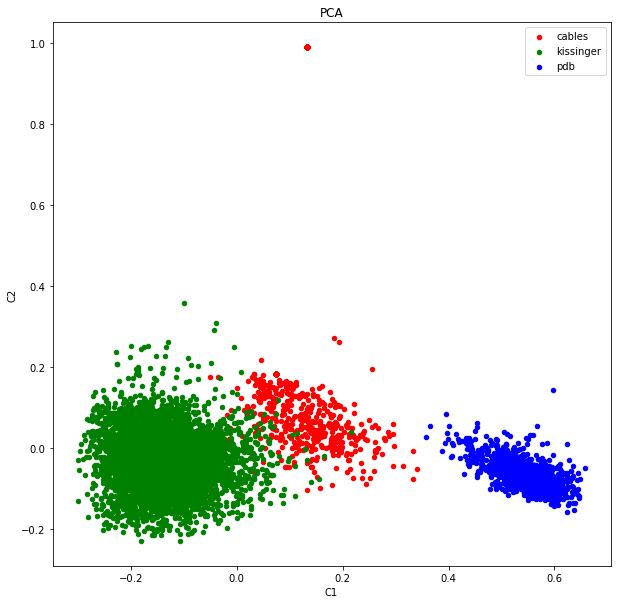

In [161]:
_, ax = plt.subplots()
for key,group in textDF.groupby('labels'):
    group.plot.scatter(ax=ax, x='C1', y='C2', label=key, color = colors[key], figsize=(10,10));
plt.title('PCA')
plt.savefig('PCA',dpi=600)
plt.show()

In [162]:
type(cablesDF['DATE'])

pandas.core.series.Series

# Dates of Cables

In [163]:
dates = cablesDF['DATE']

In [164]:
dates[:-10]

0      1973-11-11
1      1973-12-09
2      1973-12-11
3      1973-12-11
4      1973-12-12
          ...    
614    1976-12-25
615    1976-12-29
616    1976-12-29
617    1976-12-30
618    1977-01-01
Name: DATE, Length: 619, dtype: object

In [165]:
len(dates)

629

In [166]:
dateCounts = Counter(dates)

In [167]:
dateCountsLis = list(dateCounts.items())

In [168]:
days = [dateCountsLis[i][0] for i in range(len(dateCountsLis))]
counts = [dateCountsLis[i][1] for i in range(len(dateCountsLis))]

In [169]:
datesCablesDt = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
datesCablesDt[:10]

[datetime.datetime(1973, 11, 11, 0, 0),
 datetime.datetime(1973, 12, 9, 0, 0),
 datetime.datetime(1973, 12, 11, 0, 0),
 datetime.datetime(1973, 12, 11, 0, 0),
 datetime.datetime(1973, 12, 12, 0, 0),
 datetime.datetime(1973, 12, 18, 0, 0),
 datetime.datetime(1973, 12, 19, 0, 0),
 datetime.datetime(1974, 3, 26, 0, 0),
 datetime.datetime(1974, 3, 26, 0, 0),
 datetime.datetime(1974, 3, 26, 0, 0)]

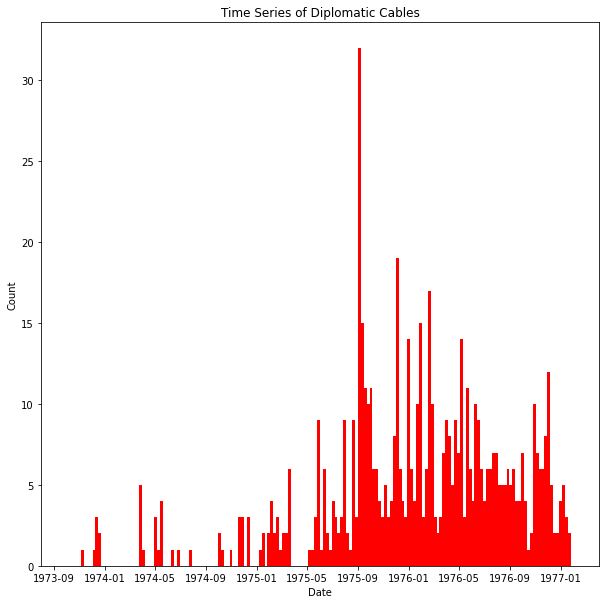

In [170]:
end = datetime.date(1977,2,1)
start = datetime.date(1973,10,1)
one_week = datetime.timedelta(days = 7)
week = []
for i in range(int(((end-start).days)/7)+1):
    week.append(start+(i)*one_week)
plt.figure(figsize=(10,10))
plt.hist(datesCablesDt, bins=week, color='r')
plt.title('Time Series of Diplomatic Cables')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('cablesTS',dpi=600)
plt.show()

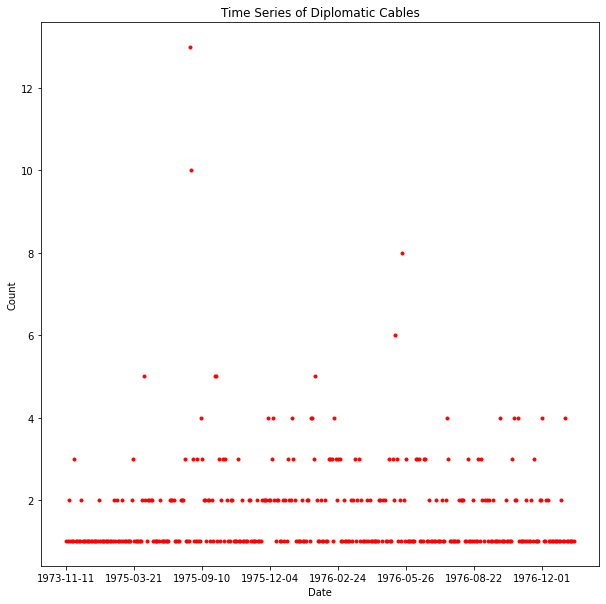

In [171]:
dateCountsSeries = pd.Series(dateCounts)
dateCountsSeries.plot(style='r.',figsize=(10,10))
plt.title('Time Series of Diplomatic Cables')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('cablesTS-day',dpi=600)
plt.show()

# Named-Entity Recognition

In [37]:
import spacy

In [38]:
nlp = spacy.load('en_core_web_lg')

In [39]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [40]:
type(cables)

list

In [41]:
cablesDoc = [nlp(cable) for cable in cables]

In [42]:
cableLengths = [len(nltk.word_tokenize(cable)) for cable in cables] 
totalCableLen = sum(cableLengths)
totalCableLen

174408

In [43]:
len(nltk.word_tokenize(cables[500]))

458

In [44]:
for ent in cablesDoc[10].ents:
    print(ent.lemma_,ent.label_)

1 CARDINAL
sa-7 ORG
usa GPE
korniyenko PERSON
march 27 DATE
soviet NORP
soviet NORP
korniyenko PERSON
redeye to third CARDINAL
hartman PERSON
london's\nheathrow airport FAC
several month ago DATE
korniyenko PERSON
soviets NORP
sa-7 ORG
korniyenko PERSON
question,\nhartman PERSON
rome\nairport FAC
september 1973 DATE
korniyenko PERSON
into\nmatter.\nkissinger\n PERSON


In [45]:
cablesCountries = []
for cableDoc in cablesDoc:
    for ent in cableDoc.ents:
        if ent.label_=='GPE' or ent.label_=='NORP':
            cablesCountries.append(lemmatizer.lemmatize(ent.text))

In [46]:
cablesCountryCounts = Counter(cablesCountries)

In [47]:
cablesCountryCounts.most_common(50)

[('israeli', 305),
 ('soviet', 215),
 ('u', 198),
 ('syrian', 170),
 ('egyptian', 135),
 ('israel', 133),
 ('british', 120),
 ('u.s.', 119),
 ('arab', 98),
 ('lebanon', 97),
 ('washington', 96),
 ('african', 86),
 ('geneva', 84),
 ('syria', 80),
 ('egypt', 74),
 ('greek', 66),
 ('angola', 63),
 ('american', 62),
 ('lebanese', 54),
 ('palestinian', 47),
 ('rhodesia', 46),
 ('cairo', 46),
 ('french', 44),
 ('the united states', 42),
 ('chinese', 41),
 ('uk', 40),
 ('turkish', 40),
 ('jordanian', 38),
 ('pakistan', 35),
 ('cuban', 32),
 ('damascus', 31),
 ('cyprus', 31),
 ('namibia', 30),
 ('turk', 28),
 ('christian', 27),
 ('beirut', 27),
 ('rhodesian', 27),
 ('korean', 25),
 ('ussr', 25),
 ('south africa', 24),
 ('china', 24),
 ('london', 23),
 ('new york', 22),
 ('saudi', 22),
 ('paris', 20),
 ('morocco', 20),
 ('zaire', 20),
 ('iran', 19),
 ('algeria', 19),
 ('algerian', 19)]

In [48]:
# Note 'us' is lemmatized to 'u'
lemmatizer.lemmatize('us')

'u'

In [49]:
cablesCountryCountsDict = dict(cablesCountryCounts)

In [50]:
cableCountryCountsClean = {
    'U.S.': cablesCountryCountsDict['u.s.'] + cablesCountryCountsDict['u'] + cablesCountryCountsDict['the united states'] + cablesCountryCountsDict['american'],
    'U.K.': cablesCountryCountsDict['uk'] + cablesCountryCountsDict['british'] + cablesCountryCountsDict['britain'],
    'Israel': cablesCountryCountsDict['israel'] + cablesCountryCountsDict['israeli'],
    'USSR': cablesCountryCountsDict['soviet'] + cablesCountryCountsDict['ussr'] + cablesCountryCountsDict['russia'] + cablesCountryCountsDict['russian'],
    'Syria': cablesCountryCountsDict['syrian'] + cablesCountryCountsDict['syria'],
    'Egypt': cablesCountryCountsDict['egypt'] + cablesCountryCountsDict['egyptian'],
    'France': cablesCountryCountsDict['french'] + cablesCountryCountsDict['france'],
    'China': cablesCountryCountsDict['chinese'] + cablesCountryCountsDict['china'],
    'Algeria': cablesCountryCountsDict['algeria'] + cablesCountryCountsDict['algerian'],
    'Lebanon': cablesCountryCountsDict['lebanon'] + cablesCountryCountsDict['lebanese'],
    'Greece': cablesCountryCountsDict['greece'] + cablesCountryCountsDict['greek'],
    'Angola': cablesCountryCountsDict['angola'] + cablesCountryCountsDict['angolan'],
    'Pakistan': cablesCountryCountsDict['pakistan'],
    'Palestine': cablesCountryCountsDict['palestine'] + cablesCountryCountsDict['palestinian'],
    'Cuba': cablesCountryCountsDict['cuba'] + cablesCountryCountsDict['cuban'],
    'Korea': cablesCountryCountsDict['korean'] + cablesCountryCountsDict['north korea'] + cablesCountryCountsDict['north korean'] + cablesCountryCountsDict['south korean'],
    'Turkey': cablesCountryCountsDict['turk'] + cablesCountryCountsDict['turkey'] + cablesCountryCountsDict['turkish'],
    'Cyprus': cablesCountryCountsDict['cypriot'] + cablesCountryCountsDict['cyprus']
}

In [51]:
cableCountryCountsClean

{'U.S.': 421,
 'U.K.': 172,
 'Israel': 438,
 'USSR': 258,
 'Syria': 250,
 'Egypt': 209,
 'France': 55,
 'China': 65,
 'Algeria': 38,
 'Lebanon': 151,
 'Greece': 76,
 'Angola': 71,
 'Pakistan': 35,
 'Palestine': 50,
 'Cuba': 38,
 'Korea': 34,
 'Turkey': 86,
 'Cyprus': 36}

In [52]:
cablesCountryCountSorted = sorted(cableCountryCountsClean.items(), key=lambda x: x[1], reverse=True)

In [53]:
cablesCountryCountSorted[:10]

[('Israel', 438),
 ('U.S.', 421),
 ('USSR', 258),
 ('Syria', 250),
 ('Egypt', 209),
 ('U.K.', 172),
 ('Lebanon', 151),
 ('Turkey', 86),
 ('Greece', 76),
 ('Angola', 71)]

In [54]:
cablesCountryFreq = []
for (country, count) in cablesCountryCountSorted:
    cablesCountryFreq.append((country, count/totalCableLen))
cablesCountryFreq[:10]

[('Israel', 0.002511352690243567),
 ('U.S.', 0.0024138800972432458),
 ('USSR', 0.0014792899408284023),
 ('Syria', 0.0014334204852988394),
 ('Egypt', 0.00119833952570983),
 ('U.K.', 0.0009861932938856016),
 ('Lebanon', 0.0008657859731204991),
 ('Turkey', 0.0004930966469428008),
 ('Greece', 0.0004357598275308472),
 ('Angola', 0.0004070914178248704)]

In [55]:
def countryCounts(texts):
    textsDoc = [nlp(text.lower()) for text in texts]
    textsCountries = []
    for textDoc in textsDoc:
        for ent in textDoc.ents:
            if ent.label_=='GPE' or ent.label_=='NORP':
                textsCountries.append(lemmatizer.lemmatize(ent.text))
    textCountryCounts = Counter(textsCountries)
    return textCountryCounts

In [56]:
pdbCountryCounts = countryCounts(pdbs)

In [57]:
pdbLengths = [len(nltk.word_tokenize(pdb)) for pdb in pdbs] 
totalPdbLen = sum(pdbLengths)
totalPdbLen

1670263

In [58]:
pdbCountryCounts.most_common(50)

[('soviet', 4857),
 ('u', 4083),
 ('ussr', 2339),
 ('communist', 2069),
 ('arab', 1995),
 ('israeli', 1884),
 ('lebanon', 1878),
 ('egypt', 1870),
 ('syrian', 1869),
 ('israel', 1783),
 ('moscow', 1614),
 ('syria', 1559),
 ('palestinian', 1419),
 ('egyptian', 1292),
 ('china', 1247),
 ('christian', 1155),
 ('angola', 1048),
 ('portugal', 1045),
 ('turkish', 1004),
 ('chinese', 948),
 ('lebanese', 773),
 ('greek', 743),
 ('peking', 726),
 ('cairo', 694),
 ('beirut', 679),
 ('french', 664),
 ('damascus', 640),
 ('cyprus', 637),
 ('turkey', 635),
 ('portuguese', 595),
 ('libya', 548),
 ('france', 518),
 ('cambodia', 512),
 ('japan', 502),
 ('saigon', 492),
 ('cuba', 482),
 ('iran', 482),
 ('phnom penh', 464),
 ('tn', 454),
 ('muslim', 451),
 ('saudi', 448),
 ('iraq', 439),
 ('saudi arabia', 439),
 ('cypriot', 438),
 ('thailand', 432),
 ('cuban', 428),
 ('greece', 404),
 ('north vietnamese', 380),
 ('lao', 380),
 ('lisbon', 374)]

In [59]:
pdbCountryCountsDict = dict(pdbCountryCounts)

In [60]:
pdbCountryCountsClean = {
    'U.S.': pdbCountryCountsDict['u.s.'] + pdbCountryCountsDict['u'] + pdbCountryCountsDict['the united states'] + pdbCountryCountsDict['american'],
    'U.K.': pdbCountryCountsDict['uk'] + pdbCountryCountsDict['british'] + pdbCountryCountsDict['britain'],
    'Israel': pdbCountryCountsDict['israel'] + pdbCountryCountsDict['israeli'],
    'USSR': pdbCountryCountsDict['soviet'] + pdbCountryCountsDict['ussr'] + pdbCountryCountsDict['russia'] + pdbCountryCountsDict['russian'],
    'Syria': pdbCountryCountsDict['syrian'] + pdbCountryCountsDict['syria'],
    'Egypt': pdbCountryCountsDict['egypt'] + pdbCountryCountsDict['egyptian'],
    'France': pdbCountryCountsDict['french'] + pdbCountryCountsDict['france'],
    'China': pdbCountryCountsDict['chinese'] + pdbCountryCountsDict['china'],
    'Algeria': pdbCountryCountsDict['algeria'] + pdbCountryCountsDict['algerian'],
    'Lebanon': pdbCountryCountsDict['lebanon'] + pdbCountryCountsDict['lebanese'],
    'Greece': pdbCountryCountsDict['greece'] + pdbCountryCountsDict['greek'],
    'Angola': pdbCountryCountsDict['angola'] + pdbCountryCountsDict['angolan'],
    'Pakistan': pdbCountryCountsDict['pakistan'],
    'Palestine': pdbCountryCountsDict['palestine'] + pdbCountryCountsDict['palestinian'],
    'Cuba': pdbCountryCountsDict['cuba'] + pdbCountryCountsDict['cuban'],
    'Korea': pdbCountryCountsDict['korean'] + pdbCountryCountsDict['north korea'] + pdbCountryCountsDict['north korean'] + pdbCountryCountsDict['south korean'],
    'Turkey': pdbCountryCountsDict['turk'] + pdbCountryCountsDict['turkey'] + pdbCountryCountsDict['turkish'],
    'Cyprus': pdbCountryCountsDict['cypriot'] + pdbCountryCountsDict['cyprus'],
    'Portugal': pdbCountryCountsDict['portugal'] + pdbCountryCountsDict['portuguese'],
    'Japan': pdbCountryCountsDict['japan'] + pdbCountryCountsDict['japanese'],
    'Libya': pdbCountryCountsDict['libya'] + pdbCountryCountsDict['libyan'],
    'Cambodia': pdbCountryCountsDict['cambodia'] + pdbCountryCountsDict['cambodian']
}

In [61]:
pdbCountryCountsClean

{'U.S.': 4327,
 'U.K.': 666,
 'Israel': 3667,
 'USSR': 7215,
 'Syria': 3428,
 'Egypt': 3162,
 'France': 1182,
 'China': 2195,
 'Algeria': 395,
 'Lebanon': 2651,
 'Greece': 1147,
 'Angola': 1188,
 'Pakistan': 166,
 'Palestine': 1543,
 'Cuba': 910,
 'Korea': 399,
 'Turkey': 1908,
 'Cyprus': 1075,
 'Portugal': 1640,
 'Japan': 805,
 'Libya': 900,
 'Cambodia': 749}

In [62]:
pdbCountryCountsSorted = sorted(pdbCountryCountsClean.items(), key=lambda x: x[1], reverse=True)

In [63]:
pdbCountryCountsSorted[:10]

[('USSR', 7215),
 ('U.S.', 4327),
 ('Israel', 3667),
 ('Syria', 3428),
 ('Egypt', 3162),
 ('Lebanon', 2651),
 ('China', 2195),
 ('Turkey', 1908),
 ('Portugal', 1640),
 ('Palestine', 1543)]

In [64]:
pdbCountryFreq = []
for (country, count) in pdbCountryCountsSorted:
    pdbCountryFreq.append((country, count/totalPdbLen))
pdbCountryFreq[:10]

[('USSR', 0.004319678996661005),
 ('U.S.', 0.0025906099817813123),
 ('Israel', 0.0021954626307353993),
 ('Syria', 0.002052371393008167),
 ('Egypt', 0.0018931150363745112),
 ('Lebanon', 0.001587175193367751),
 ('China', 0.0013141642962814838),
 ('Turkey', 0.001142335069387276),
 ('Portugal', 0.0009818812965383297),
 ('Palestine', 0.0009238066100967332)]

In [41]:
kissCountryCounts = countryCounts(kissinger)
kissCountryCounts

Counter({'new york': 263,
         'new york\n       ': 1,
         'columbus day': 1,
         'maynard      ': 1,
         'morgan': 3,
         'stoessel': 7,
         'infull': 15,
         'italian': 55,
         'india': 37,
         'chinese': 174,
         'boise': 1,
         'idaho': 3,
         'frenchman': 5,
         'reykjavik': 1,
         'ound': 1,
         'canadian': 56,
         'russian': 480,
         'arab': 443,
         'thoughtis': 1,
         'democrat': 60,
         'austrian': 19,
         'tn': 22,
         'china': 159,
         'cambodia': 59,
         'cambodian': 10,
         'peking': 27,
         'soviet': 746,
         'europe\n        ': 1,
         'french': 304,
         'european': 211,
         'german': 125,
         'ta london': 1,
         'moro': 3,
         'bonn': 39,
         'ny': 39,
         'germany': 41,
         'geneva': 187,
         'republican': 50,
         'japan': 75,
         'abshire': 2,
         'east asian': 1,
        

In [42]:
kissCountryCounts.most_common(50)

[('israeli', 1170),
 ('israel', 810),
 ('soviet', 746),
 ('egyptian', 728),
 ('russian', 480),
 ('syrian', 444),
 ('arab', 443),
 ('american', 435),
 ('british', 404),
 ('moscow', 390),
 ('greek', 373),
 ('turk', 318),
 ('french', 304),
 ('egypt', 286),
 ('washington', 273),
 ('new york', 263),
 ('jewish', 237),
 ('turkish', 216),
 ('european', 211),
 ('cyprus', 196),
 ('london', 194),
 ('u', 191),
 ('geneva', 187),
 ('syria', 181),
 ('chinese', 174),
 ('cairo', 173),
 ('turkey', 171),
 ('china', 159),
 ('the soviet union', 142),
 ('the united states', 140),
 ('dept', 128),
 ('german', 125),
 ('saudi', 120),
 ('paris', 108),
 ('vietnam', 107),
 ('d.', 97),
 ('african', 97),
 ('athens', 95),
 ('angola', 94),
 ('lebanon', 93),
 ('telecon', 92),
 ('greece', 92),
 ('jew', 81),
 ('united states', 78),
 ('japan', 75),
 ('chile', 68),
 ('jerusalem', 67),
 ('mexico', 64),
 ('ankara', 61),
 ('democrat', 60)]

In [43]:
kissCountryCountsDict = dict(kissCountryCounts)

In [49]:
kissCountryCountsClean = {
    'U.S.': kissCountryCountsDict['u'] + kissCountryCountsDict['the united states'] + kissCountryCountsDict['american'],
    'U.K.': kissCountryCountsDict['uk'] + kissCountryCountsDict['british'] + kissCountryCountsDict['britain'],
    'Israel': kissCountryCountsDict['israel'] + kissCountryCountsDict['israeli'],
    'USSR': kissCountryCountsDict['soviet'] + kissCountryCountsDict['ussr'] + kissCountryCountsDict['russia'] + kissCountryCountsDict['russian'] + kissCountryCountsDict['the soviet union'],
    'Syria': kissCountryCountsDict['syrian'] + kissCountryCountsDict['syria'],
    'Egypt': kissCountryCountsDict['egypt'] + kissCountryCountsDict['egyptian'],
    'France': kissCountryCountsDict['french'] + kissCountryCountsDict['france'],
    'China': kissCountryCountsDict['chinese'] + kissCountryCountsDict['china'],
    'Algeria': kissCountryCountsDict['algeria'] + kissCountryCountsDict['algerian'],
    'Lebanon': kissCountryCountsDict['lebanon'] + kissCountryCountsDict['lebanese'],
    'Greece': kissCountryCountsDict['greece'] + kissCountryCountsDict['greek'],
    'Angola': kissCountryCountsDict['angola'] + kissCountryCountsDict['angolan'],
    'Pakistan': kissCountryCountsDict['pakistan'],
    'Palestine': kissCountryCountsDict['palestine'] + kissCountryCountsDict['palestinian'],
    'Cuba': kissCountryCountsDict['cuba'] + kissCountryCountsDict['cuban'],
    'Korea': kissCountryCountsDict['korean'] + kissCountryCountsDict['north korea'] + kissCountryCountsDict['north korean'] + kissCountryCountsDict['south korean'],
    'Turkey': kissCountryCountsDict['turk'] + kissCountryCountsDict['turkey'] + kissCountryCountsDict['turkish'],
    'Cyprus': kissCountryCountsDict['cypriot'] + kissCountryCountsDict['cyprus'],
    'Portugal': kissCountryCountsDict['portugal'] + kissCountryCountsDict['portuguese'],
    'Japan': kissCountryCountsDict['japan'] + kissCountryCountsDict['japanese'],
    'Libya': kissCountryCountsDict['libya'] + kissCountryCountsDict['libyan'],
    'Cambodia': kissCountryCountsDict['cambodia'] + kissCountryCountsDict['cambodian']
}


In [50]:
kissCountryCountsSorted = sorted(kissCountryCountsClean.items(), key=lambda x: x[1], reverse=True)

In [51]:
kissCountryCountsSorted[:10]

[('Israel', 1980),
 ('USSR', 1429),
 ('Egypt', 1014),
 ('U.S.', 766),
 ('Turkey', 705),
 ('Syria', 625),
 ('Greece', 465),
 ('U.K.', 439),
 ('France', 357),
 ('China', 333)]

In [52]:
kissLengths = [len(nltk.word_tokenize(kiss)) for kiss in kissinger]
totalKissLen = sum(kissLengths)
totalKissLen

2082306

In [53]:
kissCountryFreq = []
for (country, count) in kissCountryCountsSorted:
    kissCountryFreq.append((country, count/totalKissLen))
kissCountryFreq[:10]

[('Israel', 0.0009508688924682539),
 ('USSR', 0.0006862584077460277),
 ('Egypt', 0.0004869601297791967),
 ('U.S.', 0.00036786139981347603),
 ('Turkey', 0.00033856695413642373),
 ('Syria', 0.00030014800898619127),
 ('Greece', 0.00022331011868572631),
 ('U.K.', 0.00021082396151190074),
 ('France', 0.00017144454273291247),
 ('China', 0.00015991885918784272)]